In [796]:
#..Exploratory Data Analysis..

# **Exploratory Data Analysis**


The purpose of this project is to master the exploratory data analysis (EDA) in banking with Pandas framework.

Goals of the Project:

1.  Explore a banking dataset with Pandas framework.
2.  Build pivot tables.
3.  Visualize the dataset with various plot types.


## Outline


*   Materials and methods
*   General part
    *   Libraries import
    *   Dataset exploration
    *   Pivot tables
    *   Visualization in Pandas
*   Tasks


***


## Materials and methods


The data that we are going to use for this is a subset of an open source Bank Marketing Data Set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.

> This dataset is publicly available for research. The details are described in \[Moro et al., 2014].

During the work, the task of preliminary analysis of a positive response (term deposit) to direct calls from a bank is to solve. In essence, the task is a matter of bank scoring, i.e. according to the characteristics of a client (potential client), their behavior is predicted (loan default, a wish to make a deposit, etc.).

In this project, we will try to give answers to a set of questions that may be relevant when analyzing banking data:

1.  What is the share of clients attracted in our source data?
2.  What are the mean values ​​of numerical features among the attracted clients?
3.  What is the average call duration for the attracted clients?
4.  What is the average age among the attracted and unmarried clients?
5.  What is the average age and call duration for different types of client employment?

In addition, we will make a visual analysis in order to plan marketing banking campaigns more effectively.


## Libraries import


Download data using a URL.


In [797]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


Alternative URL for the dataset downloading.


In [798]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/EDA_Pandas_Banking_L1/bank-additional.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [799]:
!unzip -o -q bank-additional.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


Importing the libraries necessary for this project. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots.


In [800]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

Further specify the value of the `precision` parameter equal to 2 to display two decimal signs (instead of 6 as default).


In [801]:
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format

## Dataset exploration


In this section we will explore the sourse dataset.


Let's read the data and look at the first 5 rows using the `head` method. The number of the output rows from the dataset is determined by the `head` method parameter.


In [802]:
df = pd.read_csv('Dataset/bank-additional.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.80,92.89,-46.20,1.31,5099.10,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.19,5195.80,no


### Let's look at the dataset size, feature names and their types


In [803]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.80,92.89,-46.20,1.35,5099.10,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.40,93.44,-36.10,4.97,5228.10,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.12,5195.80,no


The dataset contains 4119 objects (rows), for each of which 21 features are set (columns), including 1 target feature (`y`).


### Attributing information


Output the column (feature) names:


In [804]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Input features (column names):

1.  `age` - client's age in years (numeric)
2.  `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3.  `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4.  `education` - client's education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
5.  `default` - has credit in default? (categorical: `no`, `yes`, `unknown`)
6.  `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
7.  `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
8.  `contact` - contact communication type (categorical: `cellular`, `telephone`)
9.  `month` - last contact month of the year (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`)
10. `day_of_week` - last contact day of the week (categorical: `mon`, `tue`, `wed`, `thu`, `fri`)
11. `duration` - last contact duration, in seconds (numeric).
12. `campaign` - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
13. `pdays` - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
14. `previous` - number of contacts performed for this client before this campaign (numeric)
15. `poutcome` - outcome of the previous marketing campaign (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - employment variation rate, quarterly indicator (numeric)
17. `cons.price.idx` - consumer price index, monthly indicator (numeric)
18. `cons.conf.idx` - consumer confidence index, monthly indicator (numeric)
19. `euribor3m` - euribor 3 month rate, daily indicator (numeric)
20. `nr.employed` - number of employees, quarterly indicator (numeric)

Output feature (desired target):

21. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)


To see the general information on all the DataFrame features (columns), we use the **`info`** method:


In [805]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

As we can see, the dataset is full, no pass (`non-null`), so there is no need to fill the gaps. The dataset contains 5 integer (`int64`), 5 real (`float64`) and 11 categorical and binary (`object`) features.


Method **`describe`** shows the main statistical characteristics of the dataset for each numerical feature (`int64` and `float64` types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.


In [806]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00
mean,40.11,256.79,2.54,960.42,0.19,0.08,93.58,-40.50,3.62,5166.48
std,10.31,254.70,2.57,191.92,0.54,1.56,0.58,4.59,1.73,73.67
min,18.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.64,4963.60
25%,32.00,103.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.33,5099.10
50%,38.00,181.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,317.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,88.00,3643.00,35.00,999.00,6.00,1.40,94.77,-26.90,5.04,5228.10


To see the statistics on non-numeric features, we need to explicitly specify the feature types by the `include` parameter. We can also set `include = all` to output statistics on all the existing features.


In [807]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


The result shows that the average client refers to administrative staff (`job = admin.`), is married (`marital = married`) and has a university degree (`education = university.degree`).


For categorical (type `object`) and boolean (type `bool`) features you can use the **`value_counts`** method. Let's look at the target feature (`y`) distribution:


In [808]:
df["y"].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

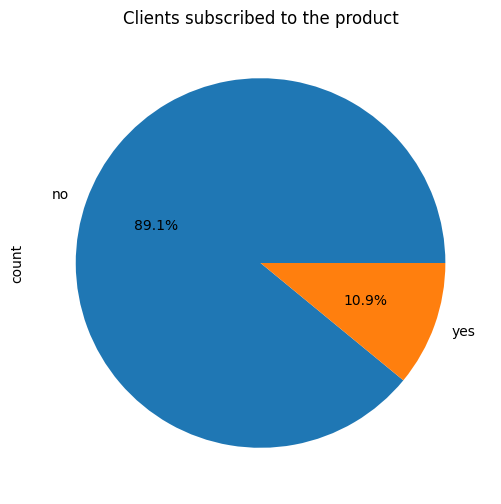

In [809]:
df['y'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='Clients subscribed to the product')
plt.show()

451 clients (10.9%) of 4119 issued a term deposit, the value of the variable `y` equals `yes`.

Let's look at the client distribution by the variable `marital`. Specify the value of the `normalize = True` parameter to view relative frequencies, but not absolute.

In [810]:
df["marital"].value_counts(normalize = True)

marital
married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: proportion, dtype: float64

As we can see, 61% (0.61) of clients are married, which must be taken into account when planning marketing campaigns to manage deposit operations.


### Sorting


A `DataFrame` can be sorted by a few feature values. In our case, for example, by `duration` (`ascending = False` for sorting in descending order):


In [811]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2231,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,yes
1546,46,admin.,divorced,high.school,no,yes,no,telephone,oct,fri,...,1,999,0,nonexistent,-0.10,93.80,-40.40,5.04,5195.80,no
1392,47,admin.,divorced,university.degree,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.40,94.47,-41.80,4.97,5228.10,yes
1685,33,blue-collar,single,high.school,no,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.80,92.89,-46.20,1.24,5099.10,yes
3266,49,blue-collar,married,basic.6y,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,yes


In [812]:
df_sorted= df.sort_values(by = "duration", ascending = False).head()
df_sorted['duration'].head()

2231    3643
1546    3253
1392    2653
1685    2301
3266    1980
Name: duration, dtype: int64

The sorting results show that the longest calls exceed one hour, as the value `duration` is more than 3600 seconds or 1 hour. At the same time, it usually was on Thursdays and Friday (`day_of_week`) and, especially, in May, June and July (`month`).


Sort by the column group:


In [813]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
477,18,student,single,unknown,no,no,no,cellular,sep,thu,...,1,3,1,success,-3.40,92.38,-29.80,0.81,5017.50,yes
899,18,student,single,unknown,no,yes,yes,telephone,aug,wed,...,1,999,0,nonexistent,-1.70,94.03,-38.30,0.90,4991.60,no
1661,18,student,single,unknown,no,yes,no,cellular,may,thu,...,1,7,2,success,-1.80,93.88,-40.00,0.68,5008.70,no
1887,19,student,single,high.school,unknown,yes,no,cellular,may,tue,...,4,999,0,nonexistent,-1.80,92.89,-46.20,1.34,5099.10,no
3268,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.80,92.89,-46.20,1.33,5099.10,no


In [814]:
df_sorted= df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()
df_sorted['duration'].head()

477     385
899     297
1661    183
1887    338
3268    410
Name: duration, dtype: int64

We see that the youngest customers are at the `age` of 18, and the call `duration` exceeded 5 minutes (300 seconds) only for three clients, which indicates the ineffectiveness of long-term interaction with such clients.


### Application of functions: `apply`, `map` etc.


**Apply the function to each column:**


In [815]:
df.apply(np.max)

age                      88
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               3643
campaign                 35
pdays                   999
previous                  6
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

The oldest client is 88 years old (`age` = 88), and the number of contacts with one of the customers reached 35 (`campaign` = 35).


**Apply the function to each column cell**


The `map` can also be used for **the values ​​replacement in a column** by passing it as an argument dictionary in form of ` {old_value: new_value}  `.

In [816]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.80,92.89,-46.20,1.31,5099.10,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.19,5195.80,0


### Indexing and extracting data


A `DataFrame` can be indexed in many ways. In this regard, consider various ways of indexing and extracting data from the DataFrame with simple question examples.

We can use the code `dataframe ['name']` to extract a separate column. 
We use this to answer the question: **What is the share of clients attracted in our DataFrame?**


In [817]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 10.9%


10.9% is a rather bad indicator for a bank, with such a percentage of attracted customers a business can collapse.


Logical indexation by one column of a `DataFrame` is very convenient. It looks like this: `df [p(df['Name']]`, where`  p ` is a certain logical condition that is checked for each element of the `Name` column. The result of such an indexation is a `DataFrame` consisting only of the rows satisfying the condition `p` by the `Name` column.

We use this to answer the question: **What are the mean values ​​of numerical features among the attracted clients?**

In [867]:
print('Average age of the attracted clients is about=', round(df[df['y'] == 1]['age'].mean(), 2))
print('Minimum campaign required to attract clients=', round(df[df['y'] == 1]['campaign'].mean(), 2))
acm= df[df['y'] == 1].describe()
acm[1:2]

Average age of the attracted clients is about= 41.89
Minimum campaign required to attract clients= 1.98


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
mean,41.89,560.79,1.98,778.72,0.59,-1.18,93.42,-39.79,2.15,5093.12,1.00


Thus, the average age of the attracted clients is about 42 (`age` = 41.89), and 2 calls were required to attract them (`campaign` = 1.98).


Combining two previous types of indexation, we will answer the question: **What is the average call duration for the attracted clients**?


In [856]:
acd = round(df[df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 20 sec


So, the average duration of a successful call is almost 560 seconds, that is, nearly 10 minutes.


**What is the average age of attracted (`y == 1`) and unmarried (`'marital' == 'single'`) clients?**


In [858]:
print("Average age of Unmarried attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of Unmarried attracted clients = 32 years


The average age of unmarried attracted clients is 32, which should be considered when working with such clients.


If we need to get the first or last line of the DataFrame, we can use the code `df[:1]` or `df[-1:]`:


In [821]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.12,5195.80,0


## Pivot tables


Suppose we want to see how observations in our sample are distributed in the context of two features - `y` and `marital`. To do this, we can build **cross tabulation** by the `crosstab` method.

In [822]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,403,2257,998,10
1,43,252,155,1


The result shows that the number of attracted married clients is 252 (`y = 1` for `married`) from the total number.


In [872]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = True)

marital,divorced,married,single,unknown
y,,,,
0,0.10,0.55,0.24,0.00
1,0.01,0.06,0.04,0.00


We see that more than half of the clients (55%, column `married`) are married and have not issued a deposit.


In `Pandas`, **pivot tables** are implemented by the method `pivot_table` with such parameters:

*   `values` – a list of variables to calculate the necessary statistics,
*   `index` – a list of variables to group data,
*   `aggfunc` — values that we actually need to count by groups - the amount, average, maximum, minimum or something else.

Let's find the average age and the call duration for different types of client employment `job`:


In [824]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.24,261.87
blue-collar,39.27,261.85
entrepreneur,42.20,249.20
housemaid,45.67,229.66
management,42.43,246.80
retired,60.87,311.79
self-employed,40.68,254.92
services,38.51,232.53
student,26.70,287.13


The obtained results allow us to plan marketing banking campaigns more effectively.


## Visualization in Pandas


Method **scatter_matrix** allows you to visualize the pairwise dependencies between the features (as well as the distribution of each feature on the diagonal). We will do it for numerical features.


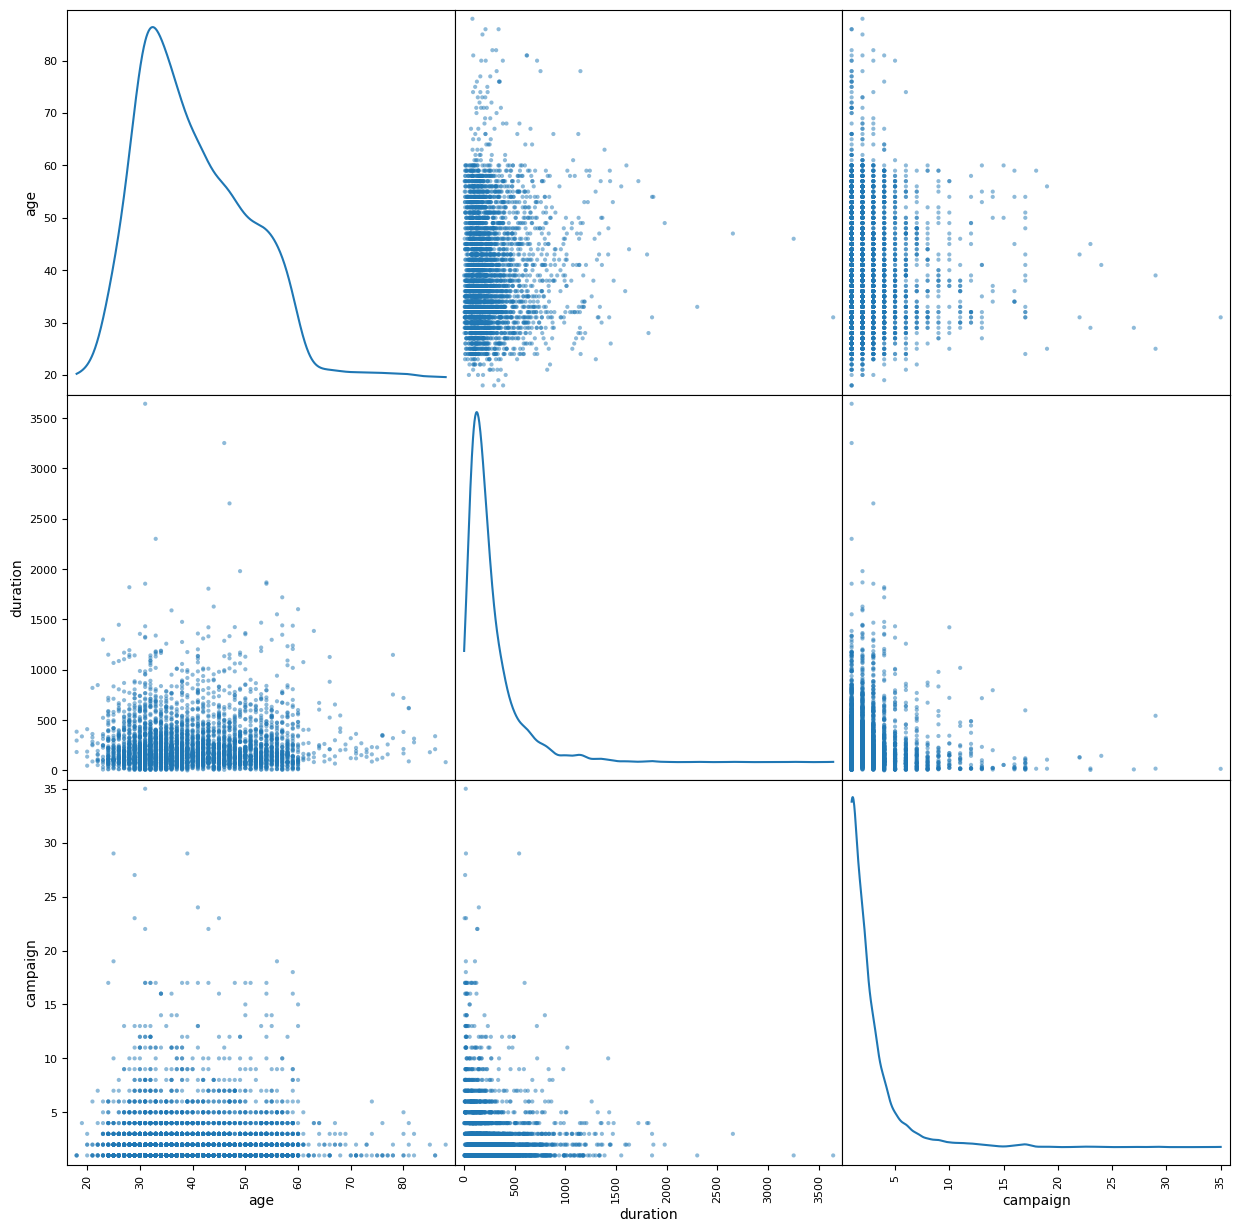

In [875]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

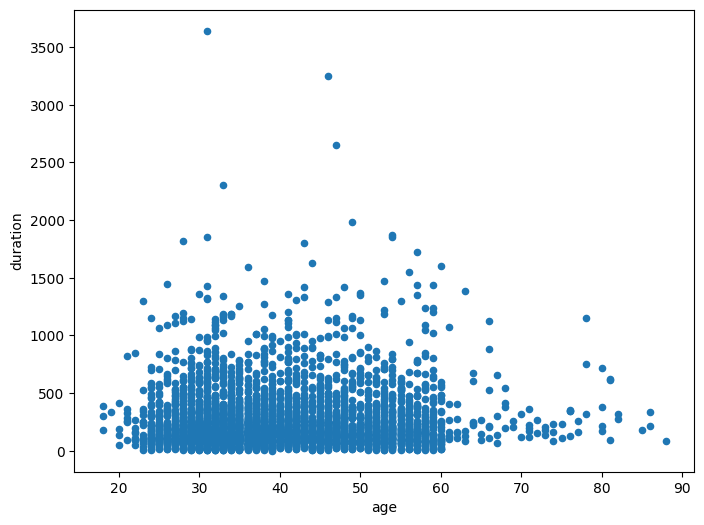

In [826]:
df.plot(x='age', y='duration', kind='scatter')
plt.show()

A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other.
The plots on the main diagonal allow you to visually define the type of data distribution: the distribution is similar to normal for age, and for a call duration and the number of contacts, the [geometric distribution](https://en.wikipedia.org/wiki/geometric_distribution?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsEDA_Pandas_Banking_L126457256-2021-01-01) is more suitable.


**Now We will build a separate histogram for `age` feature:**


<Axes: >

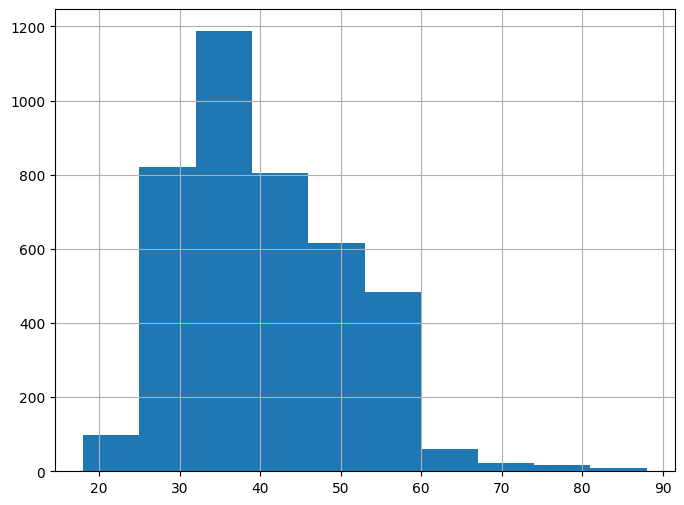

In [827]:
df["age"].hist()
# df['age'].plot(kind='hist')

The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.


**Now we will build histogram for features all together:**


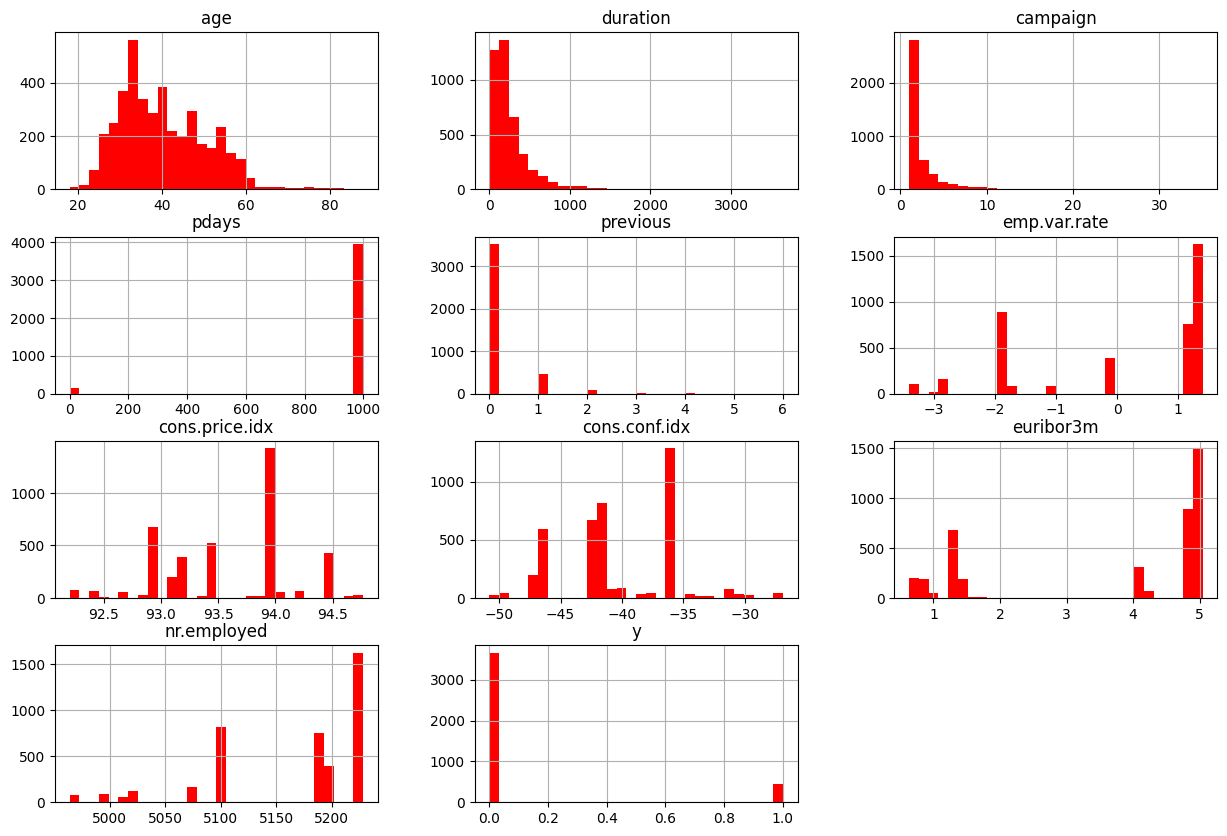

In [877]:
df.hist(color = "red",
        bins = 30,
        figsize = (15, 10))
plt.show()

A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.


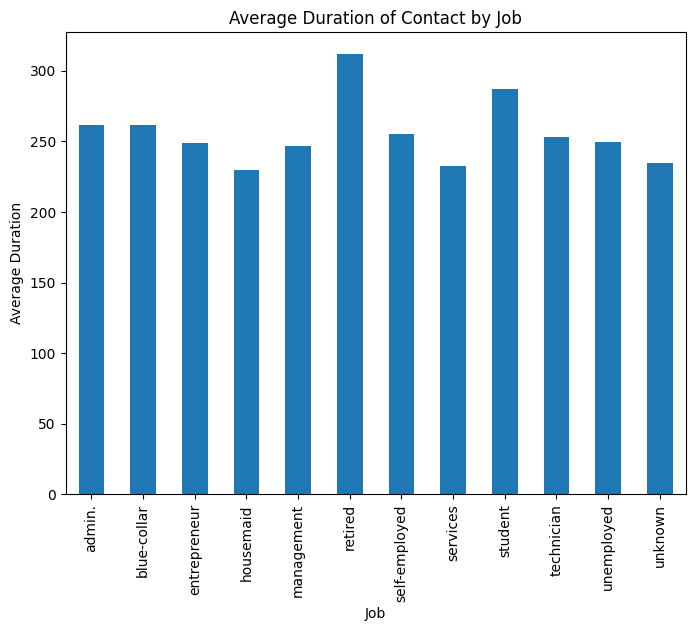

In [829]:
ax = df.groupby('job')['duration'].mean().plot(kind='bar', title='Average Duration of Contact by Job')
ax.set_xlabel('Job')
ax.set_ylabel('Average Duration')
plt.show()


## Tasks


In this section, we will solve some tasks with the source bank dataset.


### Question 1


List of 10 clients with the largest number of campaigns.


In [832]:
df.sort_values(by = "campaign", ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2552,31,services,single,high.school,no,no,no,cellular,jul,thu,...,35,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
3564,25,admin.,single,basic.9y,no,no,no,cellular,jul,thu,...,29,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
3241,39,services,married,high.school,no,yes,no,cellular,jul,thu,...,29,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
56,29,admin.,single,university.degree,no,yes,no,telephone,jun,fri,...,27,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
2485,41,technician,married,high.school,no,yes,no,telephone,jun,fri,...,24,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
2988,45,services,married,professional.course,no,yes,no,cellular,jul,mon,...,23,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
2202,29,technician,married,university.degree,no,no,no,cellular,jul,thu,...,23,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
713,43,admin.,married,high.school,no,yes,no,cellular,jul,mon,...,22,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
3569,31,admin.,single,high.school,no,no,no,telephone,may,thu,...,22,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
886,56,technician,married,university.degree,unknown,no,no,cellular,jul,mon,...,19,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0


### Question 2


Determine the average age and the number of contacts for different levels of client education.


In [833]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count"],
)


mean          count         
                      age campaign   age campaign
education                                        
basic.4y            47.66     2.42   429      429
basic.6y            40.14     2.65   228      228
basic.9y            39.23     2.35   574      574
high.school         38.10     2.63   921      921
illiterate          42.00     4.00     1        1
professional.course 40.21     2.51   535      535
university.degree   39.02     2.58  1264     1264
unknown             42.83     2.54   167      167